<a href="https://colab.research.google.com/github/Jose-Luis-Ortiz-Alvarez/Simulaciones-Sistemas-Dinamicos-y-Control/blob/main/Simulaciones/Simulaci%C3%B3n_4_Controlador_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control
!pip install matplotlib numpy
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 8.6 MB/s eta 0:00:00


SIMULACION 4 SISTEMAS DE TANQUES

José Luis Ortiz Alvarez ; Laura Sofia Castaño Pineda

Ecuación de la planta: G(s) = 0.3188 / (s^2 + 1.143*s + 0.3188)


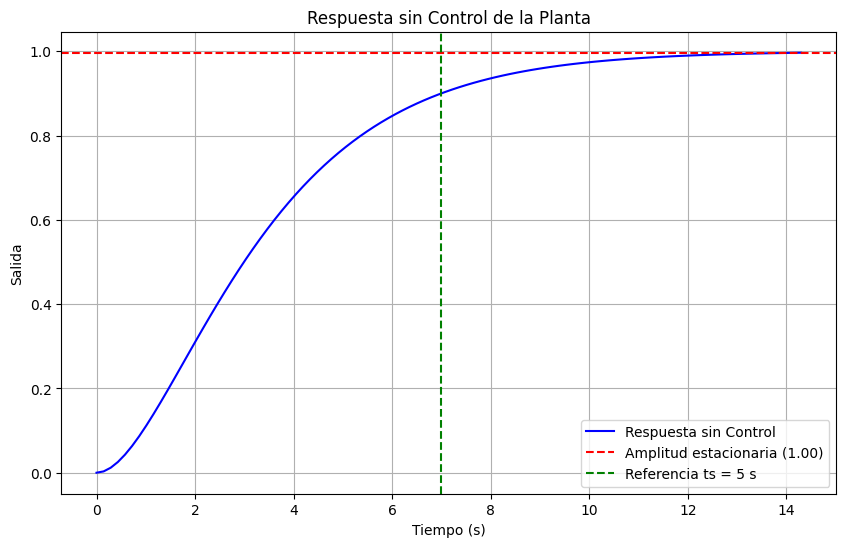

In [2]:
import control as ctrl
import matplotlib.pyplot as plt

# Definición de la planta G(s)
num = [0.3188]  # Numerador
den = [1, 1.143, 0.3188]  # Denominador
G = ctrl.TransferFunction(num, den)

# Mostrar la ecuación de la planta
print(f"Ecuación de la planta: G(s) = {num[0]} / (s^2 + {den[1]}*s + {den[2]})")

# Simulación sin control (sin PID)
t_sin_control, y_sin_control = ctrl.step_response(G)

# Calcular valor en estado estacionario
steady_state_value = y_sin_control[-1]

# Graficar respuesta sin control
plt.figure(figsize=(10, 6))
plt.plot(t_sin_control, y_sin_control, label="Respuesta sin Control", color='b')

# Agregar líneas de referencia
plt.axhline(steady_state_value, color="r", linestyle="--", label=f"Amplitud estacionaria ({steady_state_value:.2f})")
plt.axvline(7, color="g", linestyle="--", label="Referencia ts = 5 s")

# Configuración del gráfico
plt.title("Respuesta sin Control de la Planta")
plt.xlabel("Tiempo (s)")
plt.ylabel("Salida")
plt.grid(True)
plt.legend()
plt.show()


# **F.T.L.C H(S)=1**

Planta en lazo abierto G(s) = <TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          0.3188
  ----------------------
  s^2 + 1.143 s + 0.3188
FTLC (sin controlador PID) = <TransferFunction>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          0.3188
  ----------------------
  s^2 + 1.143 s + 0.6376


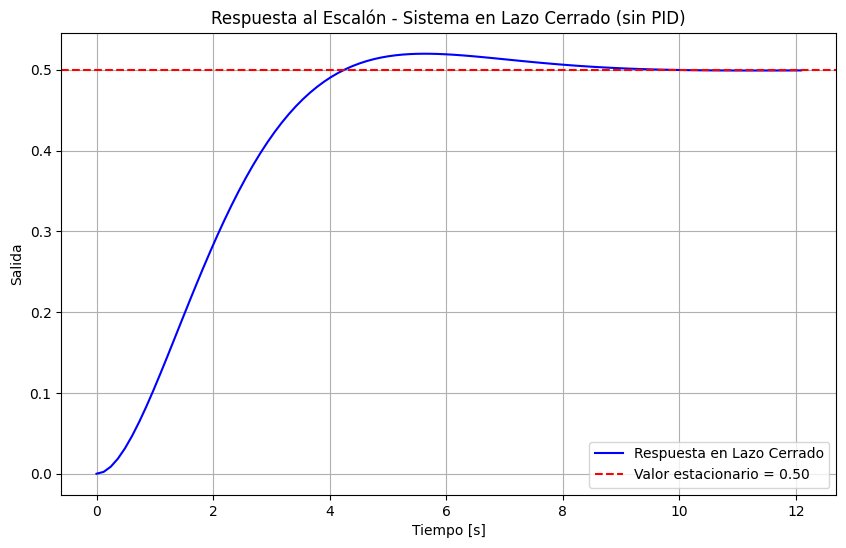

In [3]:
import control as ctrl
import matplotlib.pyplot as plt

# --- Definición de la planta G(s) ---
num = [0.3188]            # Numerador
den = [1, 1.143, 0.3188]  # Denominador
G = ctrl.TransferFunction(num, den)
print("Planta en lazo abierto G(s) =", G)

# --- Función de Transferencia en Lazo Cerrado (realimentación unitaria) ---
T = ctrl.feedback(G, 1)   # Esto forma T(s) = G(s) / (1 + G(s))
print("FTLC (sin controlador PID) =", T)

# --- Respuesta al escalón ---
t, y = ctrl.step_response(T)

# --- Ganancia DC (valor final teórico) ---
dc_gain = ctrl.dcgain(T)

# --- Graficar ---
plt.figure(figsize=(10,6))
plt.plot(t, y, label='Respuesta en Lazo Cerrado', color='b')
plt.axhline(dc_gain, color='r', linestyle='--', label=f'Valor estacionario = {dc_gain:.2f}')
plt.title('Respuesta al Escalón - Sistema en Lazo Cerrado (sin PID)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida')
plt.grid(True)
plt.legend()
plt.show()


# **CONTROLADOR PID**

Sobreimpulso máximo (Mp): 29.33%


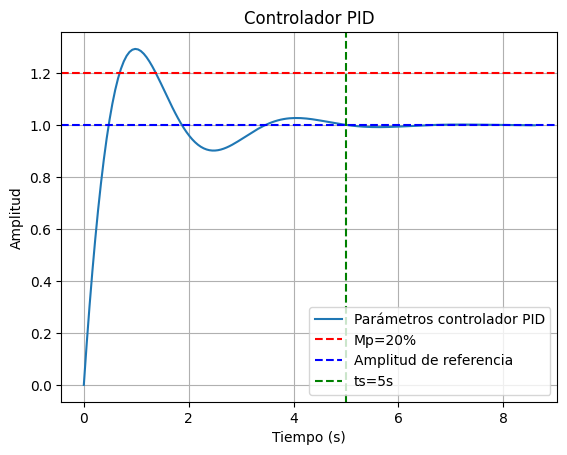

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, feedback, step_response, series

# Definir la función de transferencia G
s = tf('s')
G = 0.3188 / (s**2 + 1.143*s + 0.3188)

# Ajuste inicial de las ganancias del controlador PID
Kp = 26.32  # Ganancia proporcional
Ki = 36.88  # Ganancia integral
Kd = 9.41  # Ganancia derivativa
C = Kp + Ki / s + Kd * s

# Controlador con el sistema
F = series(C, G)

# Sistema en lazo cerrado con el controlador
L = feedback(F, 1)

# Respuesta al escalón del sistema en lazo cerrado
t, y = step_response(L)

# Cálculo del Mp (sobreimpulso máximo) y tiempo de estabilización
Mp = (max(y) - 1) * 100  # Porcentaje de sobreimpulso
tolerance = 0.20  # Tolerancia del 20% para el tiempo de estabilización
steady_state_value = y[-1]
settling_time = t[next(i for i in range(len(y)) if abs(y[i] - steady_state_value) < tolerance * steady_state_value)]

# Mostrar los resultados
print(f"Sobreimpulso máximo (Mp): {Mp:.2f}%")

# Graficar la respuesta al escalón
plt.plot(t, y, label="Parámetros controlador PID")
plt.axhline(steady_state_value * (1 + tolerance), color="r", linestyle="--", label="Mp=20%")
plt.axhline(steady_state_value * (1), color="b", linestyle="--", label="Amplitud de referencia")
plt.axvline(steady_state_value * (5), color="g", linestyle="--", label="ts=5s")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Controlador PID")
plt.legend()
plt.grid()
plt.show()

# **CONTROLADOR PID AJUSTE FINO**

Sobreimpulso máximo (Mp): 19.37%
Tiempo de estabilización (ts): 5.38 s


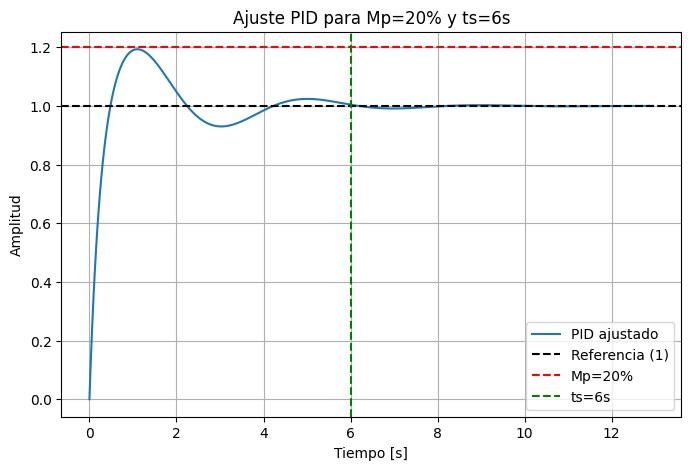

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, feedback, step_response, series

# --- Planta ---
s = tf('s')
G = 0.3188 / (s**2 + 1.143*s + 0.3188)

# --- Nuevo ajuste PID ---
Kp = 23
Ki = 40
Kd = 14
C = Kp + Ki/s + Kd*s

# --- Lazo cerrado ---
L = feedback(series(C, G), 1)

# --- Respuesta al escalón ---
t, y = step_response(L)

# --- Cálculo de Mp y ts ---
Mp = (max(y) - 1) * 100
y_final = y[-1]
tolerance = 0.02
ts = None
for i in range(len(y)-1, 0, -1):
    if abs(y[i] - y_final) > tolerance * y_final:
        ts = t[i+1]
        break

print(f"Sobreimpulso máximo (Mp): {Mp:.2f}%")
print(f"Tiempo de estabilización (ts): {ts:.2f} s")

# --- Gráfica ---
plt.figure(figsize=(8,5))
plt.plot(t, y, label="PID ajustado")
plt.axhline(1, color="k", linestyle="--", label="Referencia (1)")
plt.axhline(1 + 0.2, color="r", linestyle="--", label="Mp=20%")
plt.axvline(6, color="g", linestyle="--", label="ts=6s")
plt.title("Ajuste PID para Mp=20% y ts=6s")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(loc="best")
plt.grid(True)
plt.show()


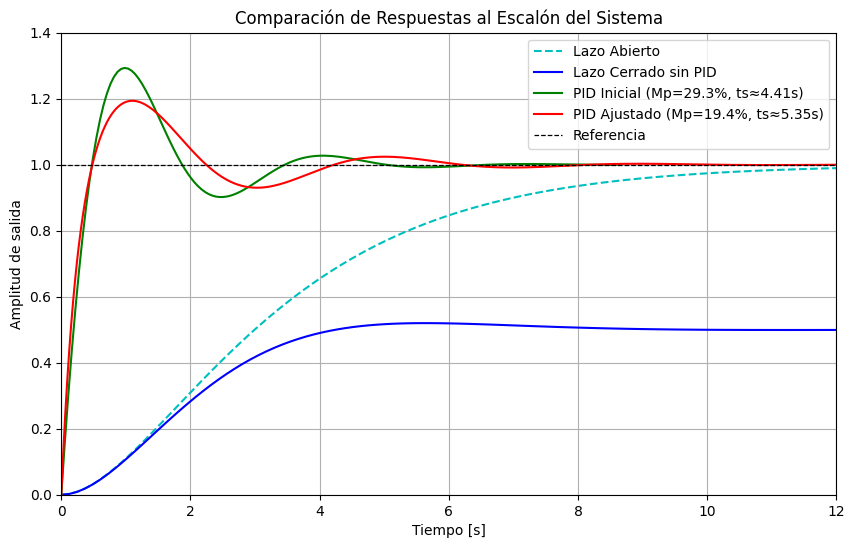

=== RESUMEN DE DESEMPEÑO ===
PID inicial: Mp = 29.33%, Ts ≈ 4.41 s
PID ajustado: Mp = 19.37%, Ts ≈ 5.35 s


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# ============================================================
# --- 1. Definición de la planta ---
# ============================================================
s = ctrl.tf('s')
G = 0.3188 / (s**2 + 1.143*s + 0.3188)

# ============================================================
# --- 2. Sistema en lazo abierto ---
# ============================================================
t1, y1 = ctrl.step_response(G)

# ============================================================
# --- 3. Sistema en lazo cerrado sin PID ---
# ============================================================
T = ctrl.feedback(G, 1)
t2, y2 = ctrl.step_response(T)

# ============================================================
# --- 4. Controlador PID inicial ---
# ============================================================
Kp1, Ki1, Kd1 = 26.32, 36.88, 9.41
C1 = Kp1 + Ki1/s + Kd1*s
L1 = ctrl.feedback(ctrl.series(C1, G), 1)
t3, y3 = ctrl.step_response(L1)

# --- Cálculo de Mp y ts para PID inicial ---
Mp1 = (max(y3) - 1) * 100
tolerance = 0.02
y_final1 = y3[-1]
ts1 = next((t3[i] for i in range(len(y3)-1, 0, -1) if abs(y3[i] - y_final1) > tolerance * y_final1), None)

# ============================================================
# --- 5. Controlador PID ajustado ---
# ============================================================
Kp2, Ki2, Kd2 = 23, 40, 14
C2 = Kp2 + Ki2/s + Kd2*s
L2 = ctrl.feedback(ctrl.series(C2, G), 1)
t4, y4 = ctrl.step_response(L2)

# --- Cálculo de Mp y ts para PID ajustado ---
Mp2 = (max(y4) - 1) * 100
y_final2 = y4[-1]
ts2 = next((t4[i] for i in range(len(y4)-1, 0, -1) if abs(y4[i] - y_final2) > tolerance * y_final2), None)

# ============================================================
# --- 6. Gráfica comparativa ---
# ============================================================
plt.figure(figsize=(10,6))
plt.plot(t1, y1, 'c--', label='Lazo Abierto')
plt.plot(t2, y2, 'b', label='Lazo Cerrado sin PID')
plt.plot(t3, y3, 'g', label=f'PID Inicial (Mp={Mp1:.1f}%, ts≈{ts1:.2f}s)')
plt.plot(t4, y4, 'r', label=f'PID Ajustado (Mp={Mp2:.1f}%, ts≈{ts2:.2f}s)')
plt.axhline(1, color='k', linestyle='--', linewidth=0.9, label='Referencia')

plt.title('Comparación de Respuestas al Escalón del Sistema')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud de salida')
plt.xlim([0, 12])   # 👈 recorta el eje X hasta 8 segundos
plt.ylim([0, 1.4]) # opcional: ajusta la escala vertical
plt.grid(True)
plt.legend(loc='best')
plt.show()

# ============================================================
# --- 7. Resumen de desempeño ---
# ============================================================
print("=== RESUMEN DE DESEMPEÑO ===")
print(f"PID inicial: Mp = {Mp1:.2f}%, Ts ≈ {ts1:.2f} s")
print(f"PID ajustado: Mp = {Mp2:.2f}%, Ts ≈ {ts2:.2f} s")
